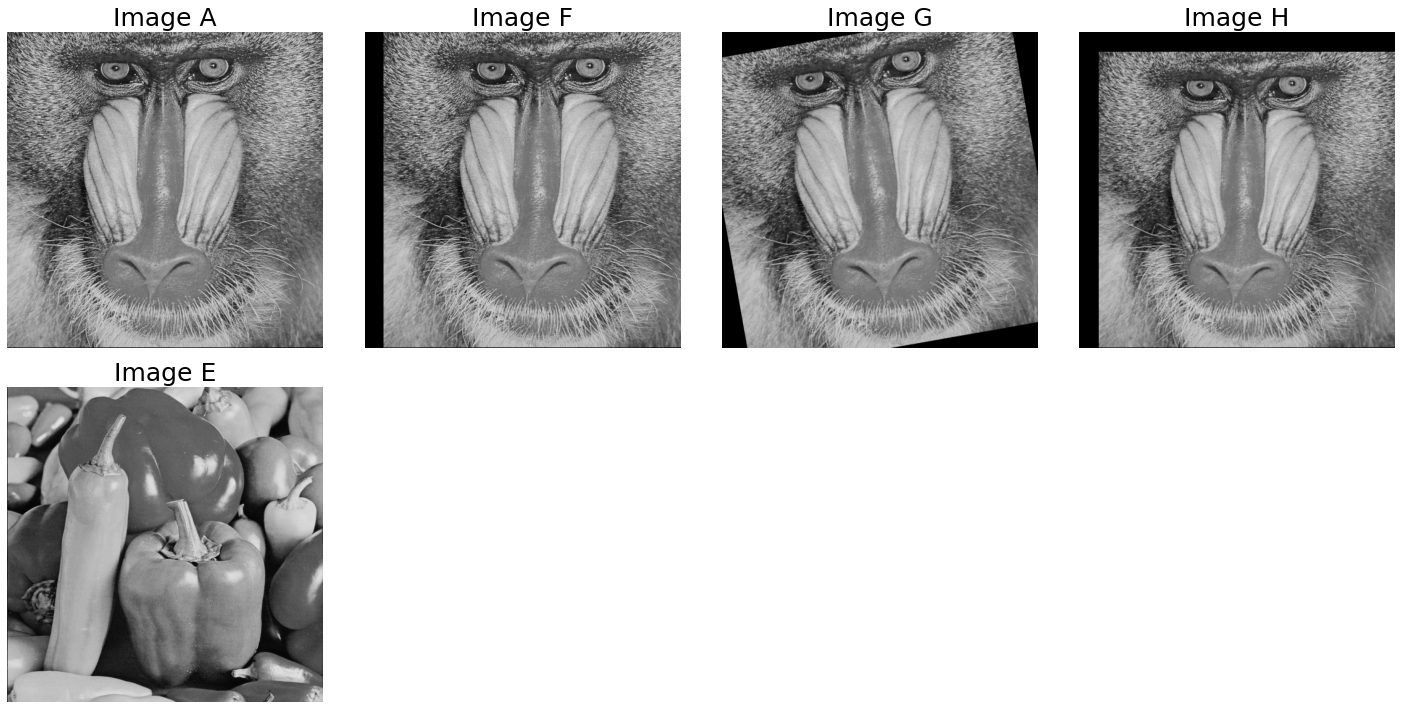

In [19]:
import cv2
from matplotlib import pyplot as plt
from math import sqrt, log10
import numpy as np
from skimage.metrics import structural_similarity, mean_squared_error
from skimage.measure import compare_nrmse

img_a = cv2.imread("pic/baboon.jpg", cv2.IMREAD_GRAYSCALE)
img_b = cv2.addWeighted(img_a, 0.5, 0, 0, 128)
img_c = 255 - img_a
shade = np.zeros((512, 512))
for i in range(512):
    shade[:, i] += i*128/512
img_d = img_a - shade
img_e = cv2.imread("pic/bell_peper.jpg", cv2.IMREAD_GRAYSCALE)


# 定义平移translate函数
def translate(image, x, y):
    # 定义平移矩阵
    M = np.float32([[1, 0, x], [0, 1, y]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
 
    # 返回转换后的图像
    return shifted
img_f = translate(img_a, 30, 0)

# 定义旋转rotate函数
def rotate(image, angle, center=None, scale=1.0):
    # 获取图像尺寸
    (h, w) = image.shape[:2]
 
    # 若未指定旋转中心，则将图像中心设为旋转中心
    if center is None:
        center = (w / 2, h / 2)
 
    # 执行旋转
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
 
    # 返回旋转后的图像
    return rotated
img_g = rotate(img_a, 10)
# 
img_h = np.zeros((512, 512))
img_h[32:, 32:] = cv2.resize(img_a, (480, 480))



fig, ax = plt.subplots(2, 5, figsize=(20, 10))
fig.set_facecolor('white')
fig.tight_layout()
[b.axis('off') for a in ax for b in a ] # Delete all axis
# 
ax[0, 0].set_title("Image A", fontsize=25)
ax[0, 0].imshow(img_a, cmap='gray', vmin=0, vmax=255)
# 
ax[0, 1].set_title("Image B", fontsize=25)
ax[0, 1].imshow(img_b, cmap='gray', vmin=0, vmax=255)
# 
ax[0, 2].set_title("Image C", fontsize=25)
ax[0, 2].imshow(img_c, cmap='gray', vmin=0, vmax=255)
# 
ax[0, 3].set_title("Image D", fontsize=25)
ax[0, 3].imshow(img_d, cmap='gray', vmin=0, vmax=255)
#
ax[0, 4].set_title("Image E", fontsize=25)
ax[0, 4].imshow(img_e, cmap='gray', vmin=0, vmax=255)



# ax[1, 0].set_title("Image E", fontsize=25)
# ax[1, 0].imshow(img_e, cmap='gray', vmin=0, vmax=255)
# # 
# ax[0, 1].set_title("Image F", fontsize=25)
# ax[0, 1].imshow(img_f, cmap='gray', vmin=0, vmax=255)
# # 
# ax[0, 2].set_title("Image G", fontsize=25)
# ax[0, 2].imshow(img_g, cmap='gray', vmin=0, vmax=255)
# # 
# ax[0, 3].set_title("Image H", fontsize=25)
# ax[0, 3].imshow(img_h, cmap='gray', vmin=0, vmax=255)




In [18]:
img1 = img_a
img2 = img_h

def psnr2(img1, img2):
    mse = np.mean( (img1/255. - img2/255.) ** 2 )
    if mse < 1.0e-10:
        return 100
    PIXEL_MAX = 1
    return 20 * log10(PIXEL_MAX / sqrt(mse))

# SSIM
(ssim, diff) = structural_similarity(img1, img2, win_size=101, full=True)
print(f"SSIM score = {ssim}")
# # PSNR
# psnr = psnr2(img1, img2)
# print(f"PSNR score = {psnr}")
# MSE
mse = mean_squared_error(img1, img2)
print(f"MSE score = {mse}")
# NRMSE
nrmse = compare_nrmse(img1, img2, norm_type='Euclidean')
print(f"NRMSE score = {nrmse}")


SSIM score = 0.2229213887964558
MSE score = 4028.1667442321777
NRMSE score = 0.4653657803235638


/home/lab530/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  if sys.path[0] == '':
/home/lab530/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: DEPRECATED: skimage.measure.compare_nrmse has been moved to skimage.metrics.normalized_root_mse. It will be removed from skimage.measure in version 0.18.
